## ASSIGNMENT 10 - REINFORCEMENT LEARNING
**Antonio Armenta 11/20/2023**


**ENVIRONMENT**  
For this assignment, I chose the "Frozen Lake" game from the Toy Text environments from Gymnasium.
  
    
**PARAMETERS: EXPLANATION AND JUSTIFICATION**  
  
**Goal:** in Frozen Lake, the player needs to cross a frozen lake from the starting point at the top-left corner of the board [0,0] to the goal at the bottom right corner [7,7]. The game consists of an 8x8 grid. The player must avoid falling into frozen water along the way.  

**reward:** the rewards structure is simple. Falling into a hole is 0 rewards, and a new episode starts with the player at the starting position. Reaching the goal is +1 reward.

**observation:** The observation is a value representing the player’s current position as current_row * nrows + current_col (where both the row and col start at 0). For example, the goal position in the 4x4 map can be calculated as follows: 3 * 4 + 3 = 15. The number of possible observations is dependent on the size of the map. The observation is returned as an int().

**terminated:** This flag is set to true when an episode ends. Reasons for an episode to end: the player moves into a hole, the player reaches the goal at max(nrow) * max(ncol) - 1 (location [max(nrow)-1, max(ncol)-1]).

**truncated:** Time limit is reached. Not used.

**Exploitation/Exploration (epsilon):** after several attempts, and doing some research, I implemented the epsilon decay logic in the Q and DQN approaches. The idea is to start with a relatively high epsilon value (where 0 < epsilon < 1). Starting epsilon values that produced good results are 0.7 and 0.8. When pairing this with a random selection of a number between 0 and 1 to compare it with epsilon, we can prioritize exploration and exploration accordingly. The epsilon decay logic makes the learning process begin with higher chances of choosing exploration. Then, as the run through each cycle, the value of epsilon is reduced by an epsilon_decay factor, until reaching a minimum value. By doin this, we progressively prioritize exploitation over exploration, as our models learn and we have more reliable predictions we can rely on. In short, when the model starts, it knows "very little", so it explores, then when it "knows more" it exploits more what it has learned.

**Learning Rate (alpha):** after several tests, I chose a relatively low value of alpha or learning rate. By doing this, older information is considered more than newer information. This produced better results, especially with the Q-Approach.

**Discount Factor (gamma):** this determines the importance of future rewards in the decision-making process. By using higher values of gamma, the logic is placing more importance on long-term rewards, which produced better results. This worked better in this game, because its rewards are sparse. You only get +1 reward when reaching the goal point and there is no other method to gain more reward points.

**map_name:** I chose to run the 4x4 grid configuration for Frozen Lake. The other option, 8x8, presented problems with the neural network chosen and running times were exceedingly high.

**total_episodes:** This is the number of episodes or "retry attempts". At the start of each new episode, the player will begin from the starting position and the model will use what it has already learned to move the player through the map (except for Random). The number of episodes for Random and Q Approaches is 10,000, while the number of episodes for the DQN approach is limited to 1,000. Running 10,000 episodes in DQN created problems with the running time.

In [4]:
#pip install gym
#pip install matplotlib
#pip install gymnasium[box2d]
#pip install ale-py


import gym
import sys
import time
import keras
import random
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from IPython import display
from collections import defaultdict
from collections import deque
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import Adam

%matplotlib inline


env = gym.make("FrozenLake-v1", render_mode="rgb_array", map_name="4x4")
env.reset()


#########################################################################################################
##################################### RANDOM APPROACH ###################################################
#########################################################################################################

# The following function follows a random approach to win the game.
# Actions are chosen randomly and the code keeps track of the number of victories in 10,000 episodes.
# To view the game playing, uncomment the lines indicated below. Warning: this will increase running time due to image rendering (but it is nice to watch).
# The function is called at the end of this cell.

def random_approach():
    
    total_episodes = 10000
    episode_rewards_count = 0
    episode_rewards_chart = []
    
    for episode in range(total_episodes):
        observation = env.reset()
        terminated = False
        episode_reward = 0
        
        while not terminated:    
            action = env.action_space.sample()  # Choose a random action within the action space
            observation, reward, terminated, truncated, info = env.step(action)
            episode_reward += reward      

            #Uncomment this to view an animation of the game playing each episode.
            #Warning: this takes longer running time because the program renders each game frame.
            #plt.imshow(env.render())
            #display.display(plt.gcf())    
            #display.clear_output(wait=True)
            
            if terminated:
                episode_rewards_chart.append(episode_reward)
                episode_rewards_count = episode_rewards_count + episode_reward
                break

    env.close()
    
    print(f"Random Approach Completed. Total Episodes: ", total_episodes, "   Total Episodes Won:", episode_rewards_count)
    
    #plt.plot(episode_rewards_chart)
    #plt.xlabel('Episode')
    #plt.ylabel('Reward')
    #plt.title('Rewards Obtained in Each Episode')
    #plt.show()

random_approach()

Random Approach Completed. Total Episodes:  10000    Total Episodes Won: 130.0


In [5]:
#########################################################################################################
#################################### Q-LEARNING APPROACH ################################################
#########################################################################################################

# This function updates a Q-table to make better guesses about the next action to take, based on previous actions and rewards.
# The function is called at the end of this cell. Please see explanation of hyperparameters at the top of this notebook.

def q_learning():
    
    total_episodes = 10000
    episode_rewards = []
    episode_reward = 0
    episode_rewards_count = 0
    
    epsilon=0.7
    alpha = 0.1
    gamma = 0.6
    min_epsilon=0.01
    epsilon_decay=0.95
    
    action_size = env.action_space.n
    state_size = env.observation_space.n
    q_table = np.zeros((state_size, action_size))

    for episode in range(total_episodes):
        env.reset()
        observation = 0
        terminated = False
        total_reward = 0

        while not terminated:
            
            state=observation
            if random.uniform(0, 1) > epsilon:
                action = np.argmax(q_table[state, :])  
            else:
                action = env.action_space.sample() 

            observation, reward, terminated, truncated, info = env.step(action)
            episode_reward += reward 

            new_state = observation
            new_state_max = np.max(q_table[new_state])
            q_table[state, action] = (1-alpha)*q_table[state, action]+alpha*(reward+gamma*new_state_max - q_table[state, action])

            total_reward += reward
            episode_rewards_count = episode_rewards_count + reward
 

    epsilon = max(min_epsilon, epsilon * epsilon_decay)  
    env.close()

    print(f"Q-Learning Approach Completed. Total Episodes: ", total_episodes, "   Total Episodes Won:", episode_rewards_count)

q_learning()

Q-Learning Approach Completed. Total Episodes:  10000    Total Episodes Won: 239.0


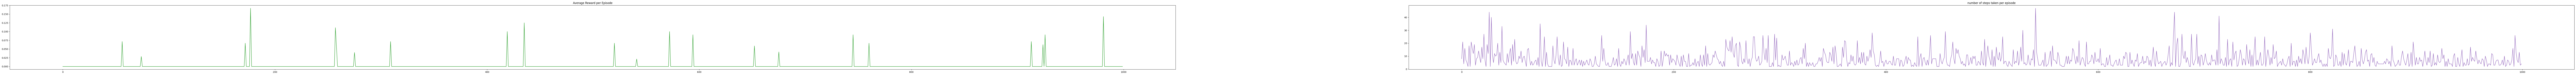

Average Reward throughout all episodes is 0.0017410416835980038
Success rate is 0.022


In [3]:
#########################################################################################################
#################################### DEEP LEARNING APPROACH #############################################
#########################################################################################################  

# This code below employs a Deep Neural Network to make better guesses about the next action to take, based on previous actions and rewards.
# Please see explanation of hyperparameters at the top of this notebook.
    
# Initialize parameters
env = gym.make("FrozenLake-v1", render_mode="rgb_array", map_name="4x4")
state_size = env.observation_space.n
action_size = env.action_space.n

gamma = 0.95
alpha = 0.8
n_hl1 = 32
n_hl2 = 32
epsilon = 0.2
num_episodes = 1000
action_space = np.arange(action_size)

    
# Network initialization.
inputs = Input(shape=[state_size,])
X = Dense(n_hl1)(inputs)
X = Dense(n_hl2)(X)
outputs = Dense(action_size)(X)
network = Model(inputs=inputs, outputs=outputs)
network.compile(optimizer=Adam(learning_rate=alpha), loss="categorical_crossentropy")
    
    
#Epsilon policy to priorize exploration / exploitation efficiently.
def epsilon_greedy_action(state, epsilon=0.2):

    state = np.eye(state_size)[state]
    qvalues = network.predict(state.reshape([1, state_size]))
    A = np.zeros((qvalues.shape[1]))+epsilon/action_size
    greedy_action = np.argmax(qvalues[0])
    A[greedy_action] += 1-epsilon
    action = np.random.choice(action_space, p=A)
    return action
    
    
# Obtain the target q_value for the current state
def target_qvalues(qvalues, action, next_state, reward):

    next_state = np.eye(state_size)[next_state]
    q_nextstate = network.predict(
    next_state.reshape([1, state_size]))
    max_q = np.argmax(q_nextstate[0])
    target_qvalues = qvalues
    target_qvalues[action] = reward+gamma*q_nextstate[0, max_q]
    return target_qvalues


# DNN update
def update_network(state, action, reward, next_state):
    
    state = np.eye(state_size)[state]
    qvalues = network.predict(state.reshape([1, state_size]))
    target_qvalues_up = target_qvalues(
    qvalues[0], action, next_state, reward).reshape([1, action_size])
    state = state.reshape([1, state_size])
    network.fit(state, target_qvalues_up, epochs=1)


#MODEL TRAINING
reward_history = []
episode_lengths = []

successes = 0

original_stdout = sys.stdout
sys.stdout = StringIO()
for i in range(num_episodes):

    # Resetting the environment
    reward_buffer = 0
    j = 0
    env.reset()
    state_now = 0
    
    # Running the episode
    while True:
        action = epsilon_greedy_action(state_now)
        state_next, reward, terminated, truncated, info = env.step(action)
        done = terminated
        reward_buffer += reward
        j += 1
        update_network(state_now, action, reward, state_next)

        if done == True:
            print(f'episode {i} is done\n')
            reward_history.append(reward_buffer/j)
            episode_lengths.append(j)
            print("Average number of steps per episode is {}".format(np.mean(episode_lengths)))

            if reward_buffer == 1:
                successes += 1
            break
        else:
            state_now = state_next

sys.stdout = original_stdout

fig, axs = plt.subplots(1, 2, figsize=(200, 5))
axs[0].plot(reward_history, 'tab:green')
axs[0].set_title('Average Reward per Episode')
axs[1].plot(episode_lengths, 'tab:purple')
axs[1].set_title('number of steps taken per episode')

plt.show()

print('Average Reward throughout all episodes is {}'.format(
    sum(reward_history)/len(reward_history)))

print('Success rate is {}'.format(successes/num_episodes))

**SUMMARY**  
  
After running each approach multiple times, I have the following takeaways:  
1) The Q-Approach consistently produces better results than the Random Approach (as expected). In the same number of episodes, the Q-Approach obtains ~100% more rewards or episode wins each time.  
2) The DQN-Approach takes too long to run. Approximately 15 minutes for 1,000 episodes. This made it impractical to run the tests I desired. Still, I believe the DQN produces acceptable results, even though it could be better.  
3) Opportunity for Improvement 1: I would like to do more research and learn more about how I can optimize the Neural Network and make it run more efficiently with the same number of episodes as the other two approaches.  
4) Opportunity for Improvement 2: I would like to learn more about how I can improve the learning process for the neural network. This was my first time working with DNN and it was certainly a very valuable exercise to immerse myself in this topic. I am interested in learning more about the network optimizers, such as Adam, and get some intuition for what is the best optimizer I can use for my dataset or problem.
5) To take this exercise further, I could run all the approaches on the 8x8 map. In fact, I ran Random and Q on this map succesfully. However, when I ran DQN, my jupyter server crashed and could not be rebooted again (had to remove it and create a new one). This was an important learning lesson in thinking through algorithm optimizations and consequences.